In [ ]:
! pip install xgboost lightgbm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Features (X) and target (y)
X = df.drop("target", axis=1)  # Drop the target column
y = df["target"]  # Target column

# Display dataset information
print("Dataset Shape:", df.shape)
print("Feature Names:", data.feature_names)
df.head()

Dataset Shape: (569, 31)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


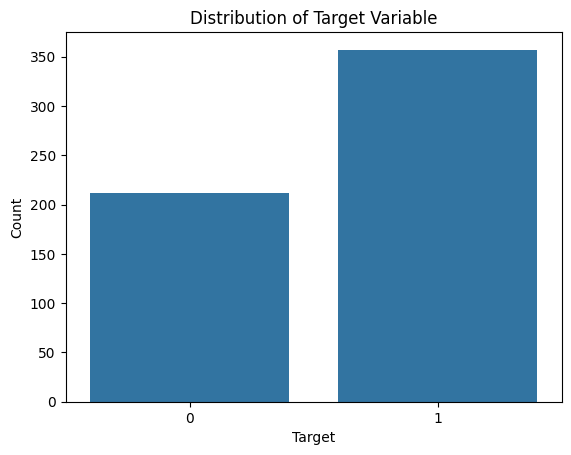

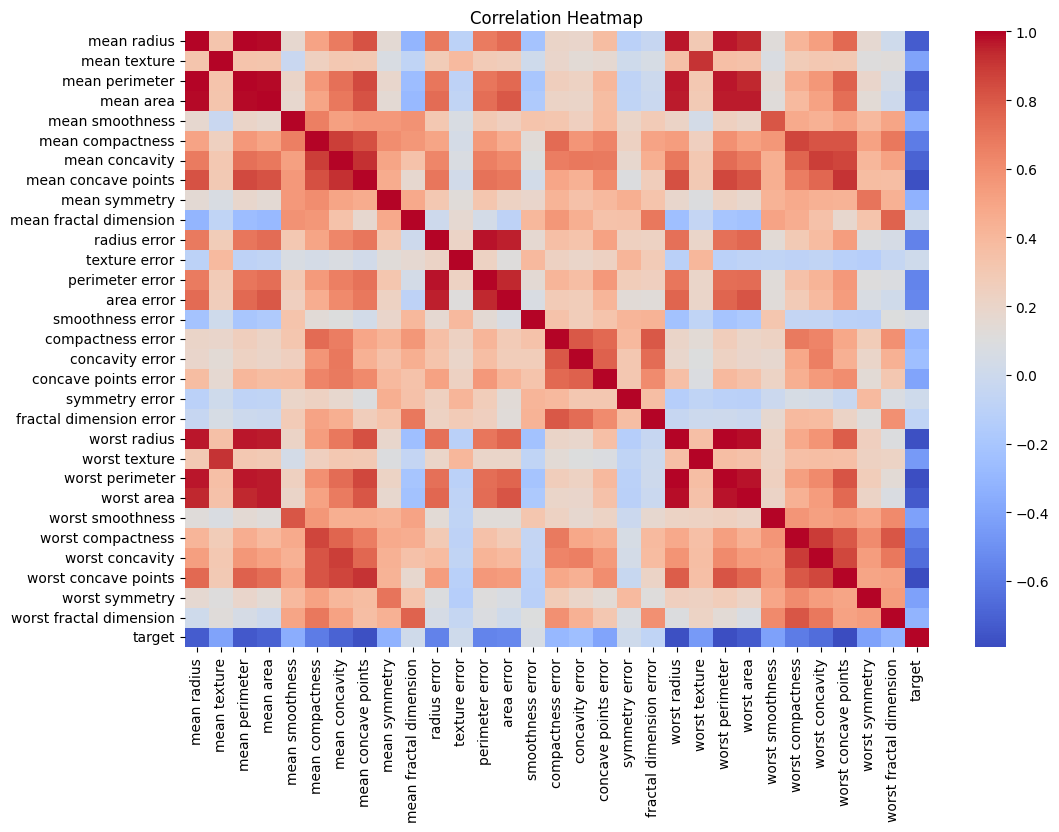

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predict with XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

/home/astane/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:52:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
# Train LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict with LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [10]:
# XGBoost Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.2f}")

XGBoost Model Performance:
Accuracy: 0.96
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 0.99


In [11]:
# LightGBM Metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgbm:.2f}")
print("Confusion Matrix:\n", conf_matrix_lgbm)
print("Classification Report:\n", class_report_lgbm)
print(f"ROC AUC Score: {roc_auc_lgbm:.2f}")

LightGBM Model Performance:
Accuracy: 0.96
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 0.99


In [12]:
# Create a comparison table
comparison = pd.DataFrame({
    "Model": ["XGBoost", "LightGBM"],
    "Accuracy": [accuracy_xgb, accuracy_lgbm],
    "ROC AUC": [roc_auc_xgb, roc_auc_lgbm]
})
print(comparison)

      Model  Accuracy   ROC AUC
0   XGBoost   0.95614  0.993122
1  LightGBM   0.95614  0.994104


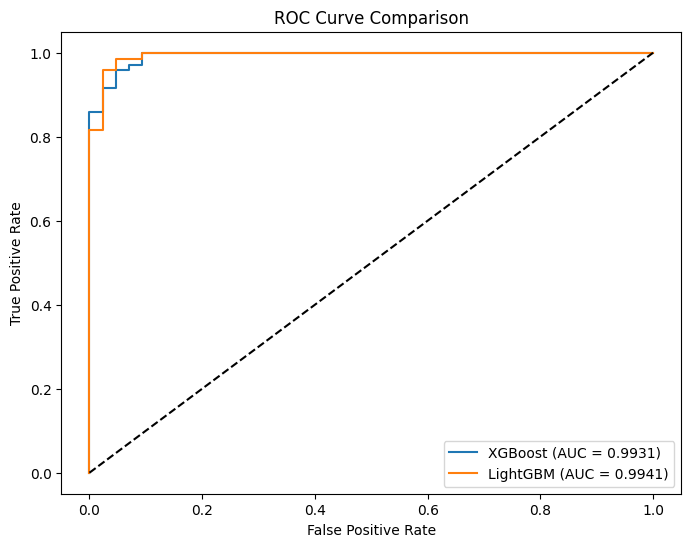

In [14]:
# Plot ROC curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.4f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {roc_auc_lgbm:.4f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

### Model Explanation and Comparison

#### XGBoost (Extreme Gradient Boosting)
XGBoost is a powerful and efficient implementation of gradient boosting algorithms. It is widely used for structured/tabular data and excels in predictive performance. Key features of XGBoost include:
- Regularization to prevent overfitting.
- Parallel processing for faster training.
- Handling missing values internally.
- Support for custom loss functions and evaluation metrics.

In this notebook, the XGBoost model was trained with 100 estimators, a learning rate of 0.1, and a maximum depth of 3. The model achieved:
- **Accuracy**: 95.61%
- **ROC AUC Score**: 0.9931

#### LightGBM (Light Gradient Boosting Machine)
LightGBM is another gradient boosting framework designed for speed and efficiency. It is particularly well-suited for large datasets and high-dimensional data. Key features of LightGBM include:
- Histogram-based learning for faster computation.
- Leaf-wise tree growth for better accuracy.
- Support for categorical features without preprocessing.

In this notebook, the LightGBM model was trained with similar hyperparameters (100 estimators, learning rate of 0.1, and maximum depth of 3). The model achieved:
- **Accuracy**: 95.61%
- **ROC AUC Score**: 0.9941

#### Comparison
Both models performed exceptionally well on the dataset, with nearly identical accuracy. However, LightGBM slightly outperformed XGBoost in terms of the ROC AUC score, indicating better discrimination between classes. Below is a summary of their performance:

| Model     | Accuracy | ROC AUC |
|-----------|----------|---------|
| XGBoost   | 95.61%   | 0.9931  |
| LightGBM  | 95.61%   | 0.9941  |

#### Conclusion
- Both models are highly effective for this classification task.
- LightGBM has a slight edge in ROC AUC, making it marginally better at distinguishing between the two classes.
- The choice between XGBoost and LightGBM may depend on factors like dataset size, computational resources, and specific use cases.


1. High Predictive Performance
Gradient Boosting algorithms, such as XGBoost and LightGBM, are known for their exceptional predictive accuracy. They are often the top choice in machine learning competitions (e.g., Kaggle) because they can capture complex patterns in data.

2. Handles Non-Linear Relationships
Gradient Boosting models can handle non-linear relationships between features and the target variable without requiring explicit feature engineering. This makes them suitable for datasets where relationships are not easily captured by linear models.

3. Feature Importance
Gradient Boosting provides insights into feature importance, helping you understand which features contribute the most to predictions. This is useful for feature selection and interpretability.

4. Robustness to Overfitting
Gradient Boosting includes regularization techniques (e.g., L1/L2 regularization in XGBoost) to prevent overfitting. Additionally, hyperparameters like learning rate, tree depth, and number of estimators can be tuned to balance bias and variance.

5. Handles Missing Data
Frameworks like XGBoost and LightGBM can handle missing values internally, reducing the need for extensive preprocessing.

6. Flexibility
Gradient Boosting supports:

Custom loss functions (e.g., for imbalanced datasets).
Various evaluation metrics (e.g., ROC AUC, log loss).
Multi-class classification, regression, and ranking tasks.
7. Efficiency
XGBoost: Optimized for speed with parallel processing and efficient memory usage.
LightGBM: Faster than XGBoost for large datasets due to histogram-based learning and leaf-wise tree growth.
8. Works Well with Tabular Data
Gradient Boosting is particularly effective for structured/tabular data, where deep learning models often struggle to outperform simpler models.

9. Versatility
Gradient Boosting can be applied to a wide range of tasks:

Classification: Predicting categories (e.g., spam detection, fraud detection).
Regression: Predicting continuous values (e.g., house prices, stock prices).
Ranking: Used in search engines and recommendation systems.
10. Real-World Applications
Gradient Boosting is used in many real-world applications, such as:

Finance: Credit scoring, fraud detection.
Healthcare: Disease prediction, patient risk assessment.
Marketing: Customer segmentation, churn prediction.
E-commerce: Product recommendation, demand forecasting.
When to Use Gradient Boosting
When you need high accuracy and are willing to invest time in hyperparameter tuning.
When your dataset has complex patterns or non-linear relationships.
When you are working with structured/tabular data.
When interpretability (e.g., feature importance) is important.
When Not to Use Gradient Boosting
If your dataset is very small, simpler models like Logistic Regression or Decision Trees may suffice.
If you need real-time predictions with very low latency, Gradient Boosting may be slower compared to simpler models.
If your data is unstructured (e.g., images, text), deep learning models like CNNs or RNNs may perform better.